TEST Match Data

In [15]:
import os
import json
import pandas as pd

json_dir =r"C:\Users\MOHAMED RAZIK\Desktop\My_code\CricSheet\tests_male_json"

json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

all_deliveries = []

for json_file in json_files:
    file_path = os.path.join(json_dir, json_file)
    with open(file_path, 'r') as f:
        data = json.load(f)
        
        
        city = data['info'].get('city', 'Unknown')
        dates = data['info']['dates'][0] 
        event_name = data['info'].get('event', {}).get('name', 'Unknown')
        match_type = data['info']['match_type']
        if 'result' in data['info']['outcome']:
            result = data['info']['outcome']['result']
        elif 'winner' in data['info']['outcome']:
            result = data['info']['outcome']['winner']
        
        player_of_match = data['info'].get('player_of_match', ['Unknown'])[0]  
        
        
        if 'innings' in data:
            for inning in data['innings']:
                team_name = inning['team']
                if 'overs' in inning:
                    for over_data in inning['overs']:
                        over_number = over_data['over']
                        if 'deliveries' in over_data:
                            for delivery in over_data['deliveries']:
                                batter = delivery['batter']
                                bowler = delivery['bowler']
                                non_striker = delivery['non_striker']
                                runs_batter = delivery['runs']['batter']
                                runs_extras = delivery['runs']['extras']
                                runs_total = delivery['runs']['total']
                                
                                
                                all_deliveries.append({
                                    'city': city,
                                    'date': dates,
                                    'event_name': event_name,
                                    'match_type': match_type,
                                    'result': result,
                                    'player_of_match': player_of_match,
                                    'team': team_name,
                                    'over': over_number,
                                    'batter': batter,
                                    'bowler': bowler,
                                    'non_striker': non_striker,
                                    'runs_batter': runs_batter,
                                    'runs_extras': runs_extras,
                                    'runs_total': runs_total
                                })


df = pd.DataFrame(all_deliveries)


print(df.head())



    city        date                             event_name match_type  \
0  Perth  2016-11-03  South Africa in Australia Test Series       Test   
1  Perth  2016-11-03  South Africa in Australia Test Series       Test   
2  Perth  2016-11-03  South Africa in Australia Test Series       Test   
3  Perth  2016-11-03  South Africa in Australia Test Series       Test   
4  Perth  2016-11-03  South Africa in Australia Test Series       Test   

         result player_of_match          team  over   batter    bowler  \
0  South Africa        K Rabada  South Africa     0  SC Cook  MA Starc   
1  South Africa        K Rabada  South Africa     0  SC Cook  MA Starc   
2  South Africa        K Rabada  South Africa     0  SC Cook  MA Starc   
3  South Africa        K Rabada  South Africa     0  SC Cook  MA Starc   
4  South Africa        K Rabada  South Africa     0  HM Amla  MA Starc   

  non_striker  runs_batter  runs_extras  runs_total  
0     D Elgar            0            0           0  
1 

In [8]:
df.head()

,city,date,event_name,match_type,result,player_of_match,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total
0,Perth,2016-11-03,South Africa in Australia Test Series,Test,South Africa,K Rabada,South Africa,0,SC Cook,MA Starc,D Elgar,0,0,0
1,Perth,2016-11-03,South Africa in Australia Test Series,Test,South Africa,K Rabada,South Africa,0,SC Cook,MA Starc,D Elgar,0,0,0
2,Perth,2016-11-03,South Africa in Australia Test Series,Test,South Africa,K Rabada,South Africa,0,SC Cook,MA Starc,D Elgar,0,0,0
3,Perth,2016-11-03,South Africa in Australia Test Series,Test,South Africa,K Rabada,South Africa,0,SC Cook,MA Starc,D Elgar,0,0,0
4,Perth,2016-11-03,South Africa in Australia Test Series,Test,South Africa,K Rabada,South Africa,0,HM Amla,MA Starc,D Elgar,0,0,0


In [9]:
df.isnull().sum()

city               0
date               0
event_name         0
match_type         0
result             0
player_of_match    0
team               0
over               0
batter             0
bowler             0
non_striker        0
runs_batter        0
runs_extras        0
runs_total         0
dtype: int64

In [10]:
df.to_csv("cricket_data_test.csv", index= False)

In [13]:
import mysql.connector

mydb = mysql.connector.connect(
    host="localhost",
    user="root",    
    password="Mysql@4321",
    database="cricket_db"
)

mycursor = mydb.cursor()

create_table_query = """
CREATE TABLE IF NOT EXISTS tests (
    id INT AUTO_INCREMENT PRIMARY KEY,
    city VARCHAR(255),
    date DATE,
    event_name VARCHAR(255),
    match_type VARCHAR(255),
    result VARCHAR(255),
    player_of_match VARCHAR(255),
    team VARCHAR(255),
    `over` INT,
    batter VARCHAR(255),
    bowler VARCHAR(255),
    non_striker VARCHAR(255),
    runs_batter INT,
    runs_extras INT,
    runs_total INT
)
"""

mycursor.execute(create_table_query)
mydb.commit()
print("Table created successfully")

Table created successfully


In [16]:
import pandas as pd
import mysql.connector

# Load the CSV file
csv_path = r"C:\Users\MOHAMED RAZIK\Desktop\My_code\Project2\cricket_data_test.csv"
df = pd.read_csv(csv_path)

# Convert DataFrame to list of tuples
data = [tuple(row) for row in df.itertuples(index=False, name=None)]

# MySQL connection
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Mysql@4321',
    database='cricket_db'
)
mycursor = mydb.cursor()

# Insert query
insert_query = """
INSERT INTO tests (
    city, date, event_name, match_type, result, player_of_match, team, `over`,
    batter, bowler, non_striker, runs_batter, runs_extras, runs_total
)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

# Chunked insert
batch_size = 5000
total_rows = len(data)

print(f"Starting insertion of {total_rows} rows in batches of {batch_size}...")

for i in range(0, total_rows, batch_size):
    batch = data[i:i+batch_size]
    try:
        mycursor.executemany(insert_query, batch)
        mydb.commit()
        print(f"✅ Inserted batch {i // batch_size + 1} ({len(batch)} rows)")
    except mysql.connector.Error as err:
        print(f"❌ Error in batch {i // batch_size + 1}: {err}")
        mydb.rollback()

# Close connection
mycursor.close()
mydb.close()
print("🎉 Data insertion completed successfully!")


Starting insertion of 1628701 rows in batches of 5000...
✅ Inserted batch 1 (5000 rows)
✅ Inserted batch 2 (5000 rows)
✅ Inserted batch 3 (5000 rows)
✅ Inserted batch 4 (5000 rows)
✅ Inserted batch 5 (5000 rows)
✅ Inserted batch 6 (5000 rows)
✅ Inserted batch 7 (5000 rows)
✅ Inserted batch 8 (5000 rows)
✅ Inserted batch 9 (5000 rows)
✅ Inserted batch 10 (5000 rows)
✅ Inserted batch 11 (5000 rows)
✅ Inserted batch 12 (5000 rows)
✅ Inserted batch 13 (5000 rows)
✅ Inserted batch 14 (5000 rows)
✅ Inserted batch 15 (5000 rows)
✅ Inserted batch 16 (5000 rows)
✅ Inserted batch 17 (5000 rows)
✅ Inserted batch 18 (5000 rows)
✅ Inserted batch 19 (5000 rows)
✅ Inserted batch 20 (5000 rows)
✅ Inserted batch 21 (5000 rows)
✅ Inserted batch 22 (5000 rows)
✅ Inserted batch 23 (5000 rows)
✅ Inserted batch 24 (5000 rows)
✅ Inserted batch 25 (5000 rows)
✅ Inserted batch 26 (5000 rows)
✅ Inserted batch 27 (5000 rows)
✅ Inserted batch 28 (5000 rows)
✅ Inserted batch 29 (5000 rows)
✅ Inserted batch 30 (500

In [4]:
row_count = len(df)
print(f"Number of rows: {row_count}")

Number of rows: 1628701


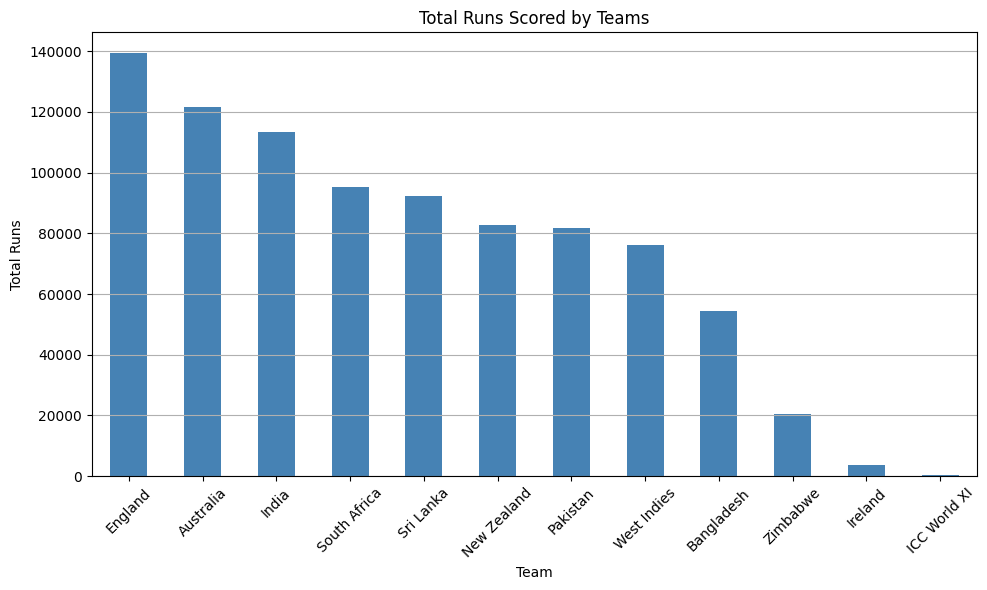

In [9]:
import matplotlib.pyplot as plt

# Aggregate runs by team
team_runs = df.groupby('team')['runs_total'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
team_runs.plot(kind='bar', color='steelblue')
plt.title("Total Runs Scored by Teams")
plt.xlabel("Team")
plt.ylabel("Total Runs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


C:\Users\MOHAMED RAZIK\AppData\Local\Temp\ipykernel_900\1533995858.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




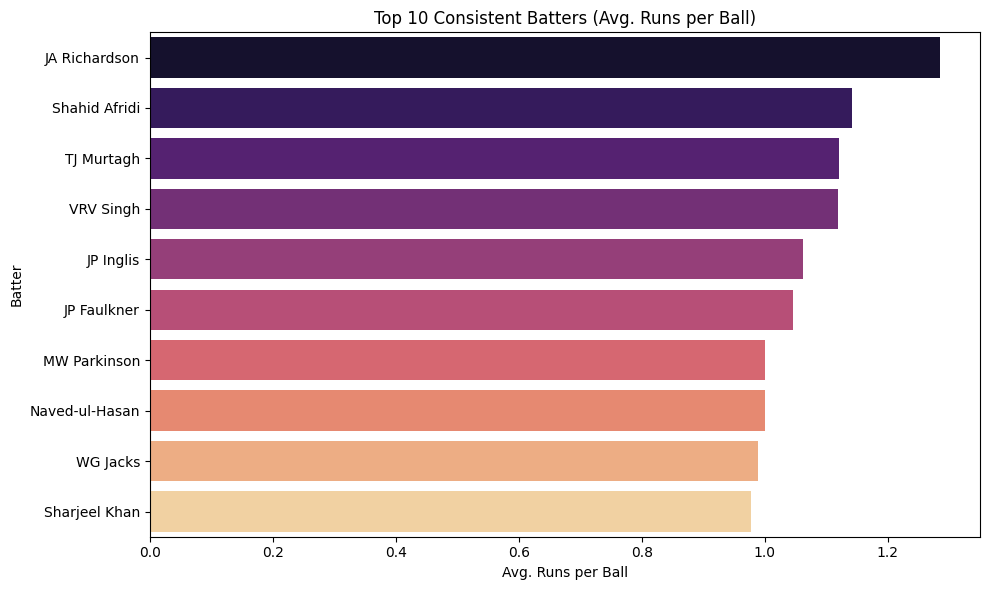

In [10]:
import seaborn as sns

# Calculate total runs and balls faced per batter
batter_stats = df.groupby('batter').agg(
    total_runs=('runs_batter', 'sum'),
    balls_faced=('runs_batter', 'count')
)

batter_stats['avg_runs_per_ball'] = batter_stats['total_runs'] / batter_stats['balls_faced']

# Get top 10 consistent batters
top_consistent_batters = batter_stats.sort_values(by='avg_runs_per_ball', ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_consistent_batters, x='avg_runs_per_ball', y='batter', palette='magma')
plt.title("Top 10 Consistent Batters (Avg. Runs per Ball)")
plt.xlabel("Avg. Runs per Ball")
plt.ylabel("Batter")
plt.tight_layout()
plt.show()


In [16]:
import plotly.express as px
import plotly.io as pio

# ✅ Set Plotly to open charts in the browser
pio.renderers.default = 'browser'

# ✅ Check required columns exist
required_columns = {'bowler', 'runs_total'}
missing_cols = required_columns - set(df.columns)
if missing_cols:
    raise ValueError(f"Missing columns in DataFrame: {missing_cols}")

# ✅ Calculate bowler stats
bowler_stats = df.groupby('bowler').agg(
    total_runs_conceded=('runs_total', 'sum'),
    balls_bowled=('runs_total', 'count')
).reset_index()

# ✅ Add economy rate
bowler_stats['economy'] = bowler_stats['total_runs_conceded'] / bowler_stats['balls_bowled']

# ✅ Add strike rate = balls per run conceded
bowler_stats['strike_rate'] = bowler_stats['balls_bowled'] / bowler_stats['total_runs_conceded']

# ✅ Filter: Only bowlers with at least 100 balls
top_economical_bowlers = bowler_stats[bowler_stats['balls_bowled'] >= 100]
top_economical_bowlers = top_economical_bowlers.sort_values(by='economy').head(10)

# ✅ Create interactive bar chart (no text on bars)
fig = px.bar(
    top_economical_bowlers,
    x='economy',
    y='bowler',
    orientation='h',
    color='economy',
    color_continuous_scale='Tealgrn',
    title='🧤 Top 10 Most Economical Bowlers (Min. 100 Balls)<br><sup>Based on Economy Rate with Bowling Strike Rate Insight</sup>',
    labels={'economy': 'Economy Rate', 'bowler': 'Bowler'},
    hover_data={
        'economy': ':.2f',
        'balls_bowled': True,
        'total_runs_conceded': True,
        'strike_rate': ':.2f'
    }
)

# ✅ Layout enhancements
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    plot_bgcolor='rgba(245, 245, 245, 1)',
    paper_bgcolor='white',
    font=dict(size=14),
    xaxis=dict(title='Economy Rate'),
    hoverlabel=dict(bgcolor="white", font_size=13)
)

# ✅ Remove text labels on bars
fig.update_traces(text=None)

# ✅ Show plot
fig.show()


IPL Match data

In [4]:
import os
import json
import pandas as pd

# Directory containing IPL JSON files
json_dir = r"C:\Users\MOHAMED RAZIK\Desktop\My_code\CricSheet\ipl_male_json"

# List all JSON files in directory
json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

all_deliveries = []

# Loop through each match file
for json_file in json_files:
    file_path = os.path.join(json_dir, json_file)
    with open(file_path, 'r') as f:
        data = json.load(f)

        # Extract general match info
        city = data['info'].get('city', 'Unknown')
        date = data['info']['dates'][0]
        season = pd.to_datetime(date).year
        event_name = data['info'].get('event', {}).get('name', 'Unknown')
        match_type = data['info']['match_type']
        venue = data['info'].get('venue', 'Unknown')

        # Determine match result
        if 'result' in data['info']['outcome']:
            result = data['info']['outcome']['result']
        elif 'winner' in data['info']['outcome']:
            result = data['info']['outcome']['winner']
        else:
            result = 'Unknown'

        player_of_match = data['info'].get('player_of_match', ['Unknown'])[0]
        teams = data['info'].get('teams', [])

        # Process innings and deliveries
        if 'innings' in data:
            for i, inning in enumerate(data['innings']):
                batting_team = inning['team']
                bowling_team = teams[1] if teams[0] == batting_team else teams[0]

                if 'overs' in inning:
                    for over_data in inning['overs']:
                        over_number = over_data['over']

                        if 'deliveries' in over_data:
                            for d_idx, delivery in enumerate(over_data['deliveries']):
                                # Basic delivery info
                                batter = delivery['batter']
                                bowler = delivery['bowler']
                                non_striker = delivery['non_striker']
                                runs_batter = delivery['runs']['batter']
                                runs_extras = delivery['runs']['extras']
                                runs_total = delivery['runs']['total']

                                # Generate ball number like 6.1, 6.2 etc.
                                ball = round(over_number + ((d_idx + 1) / 10), 1)

                                # Extras details
                                wides = delivery.get('extras', {}).get('wides', 0)
                                noballs = delivery.get('extras', {}).get('noballs', 0)
                                byes = delivery.get('extras', {}).get('byes', 0)
                                legbyes = delivery.get('extras', {}).get('legbyes', 0)

                                # Wicket info
                                wicket_type = None
                                player_dismissed = None
                                out = 0
                                if 'wickets' in delivery:
                                    for w in delivery['wickets']:
                                        wicket_type = w.get('kind')
                                        player_dismissed = w.get('player_out')
                                        out = 1

                                # Append all info to the list
                                all_deliveries.append({
                                    'season': season,
                                    'city': city,
                                    'venue': venue,
                                    'date': date,
                                    'event_name': event_name,
                                    'match_type': match_type,
                                    'result': result,
                                    'player_of_match': player_of_match,
                                    'team': batting_team,
                                    'batting_team': batting_team,
                                    'bowling_team': bowling_team,
                                    'over': over_number,
                                    'ball': ball,
                                    'batter': batter,
                                    'bowler': bowler,
                                    'non_striker': non_striker,
                                    'runs_batter': runs_batter,
                                    'runs_extras': runs_extras,
                                    'runs_total': runs_total,
                                    'wides': wides,
                                    'noballs': noballs,
                                    'byes': byes,
                                    'legbyes': legbyes,
                                    'wicket_type': wicket_type,
                                    'player_dismissed': player_dismissed,
                                    'out': out
                                })

# Convert list of deliveries to DataFrame
df = pd.DataFrame(all_deliveries)

# Show first few rows of final dataset
print(df.head())


   season       city                                      venue        date  \
0    2017  Hyderabad  Rajiv Gandhi International Stadium, Uppal  2017-04-05   
1    2017  Hyderabad  Rajiv Gandhi International Stadium, Uppal  2017-04-05   
2    2017  Hyderabad  Rajiv Gandhi International Stadium, Uppal  2017-04-05   
3    2017  Hyderabad  Rajiv Gandhi International Stadium, Uppal  2017-04-05   
4    2017  Hyderabad  Rajiv Gandhi International Stadium, Uppal  2017-04-05   

              event_name match_type               result player_of_match  \
0  Indian Premier League        T20  Sunrisers Hyderabad    Yuvraj Singh   
1  Indian Premier League        T20  Sunrisers Hyderabad    Yuvraj Singh   
2  Indian Premier League        T20  Sunrisers Hyderabad    Yuvraj Singh   
3  Indian Premier League        T20  Sunrisers Hyderabad    Yuvraj Singh   
4  Indian Premier League        T20  Sunrisers Hyderabad    Yuvraj Singh   

                  team         batting_team  ... runs_batter  runs_e

In [5]:
df.isnull().sum()

season                   0
city                     0
venue                    0
date                     0
event_name               0
match_type               0
result                   0
player_of_match          0
team                     0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
runs_batter              0
runs_extras              0
runs_total               0
wides                    0
noballs                  0
byes                     0
legbyes                  0
wicket_type         262371
player_dismissed    262371
out                      0
dtype: int64

In [ ]:
df.to_csv("cricket_data_ipl.csv", index= False)

In [ ]:
import mysql.connector

# Connect to MySQL database
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Mysql@4321",
    database="cricket_db"
)

mycursor = mydb.cursor()

# Create table with all 27 columns (including id as primary key)
create_table_query = """
CREATE TABLE IF NOT EXISTS ipl (
    id INT AUTO_INCREMENT PRIMARY KEY,           -- Unique row identifier
    season INT,                                   -- Extracted year from match date
    city VARCHAR(255),                            -- Match city
    venue VARCHAR(255),                           -- Match venue/stadium
    date DATE,                                    -- Match date
    event_name VARCHAR(255),                      -- Event name (e.g., IPL)
    match_type VARCHAR(50),                       -- Match type (e.g., T20)
    result VARCHAR(255),                          -- Match result
    player_of_match VARCHAR(255),                 -- Player of the match
    team VARCHAR(255),                            -- Innings team (batting)
    batting_team VARCHAR(255),                    -- Same as team (explicit)
    bowling_team VARCHAR(255),                    -- Opponent team
    `over` INT,                                   -- Over number
    ball FLOAT,                                   -- Ball number like 5.1, 7.6
    batter VARCHAR(255),                          -- Striker
    bowler VARCHAR(255),                          -- Bowler
    non_striker VARCHAR(255),                     -- Non-striker
    runs_batter INT,                              -- Runs scored by batter
    runs_extras INT,                              -- Extras (wides, legbyes, etc.)
    runs_total INT,                               -- Total runs from that ball
    wides INT,                                     -- Wide runs
    noballs INT,                                   -- No-ball runs
    byes INT,                                      -- Bye runs
    legbyes INT,                                   -- Legbye runs
    wicket_type VARCHAR(50),                      -- Type of wicket (caught, bowled, etc.)
    player_dismissed VARCHAR(255),                -- Player who got out
    `out` TINYINT                                  -- 1 if wicket fell, 0 otherwise
)
"""

# Execute and commit the table creation
mycursor.execute(create_table_query)
mydb.commit()

print("Table 'ipl' created successfully with 27 columns.")


Table 'ipl' created successfully with 27 columns.


In [ ]:
import pandas as pd
import mysql.connector
import numpy as np

# ✅ Load the CSV
csv_path = r"C:\Users\MOHAMED RAZIK\Desktop\My_code\Project2\cricket_data_ipl.csv"
df = pd.read_csv(csv_path)

# ✅ Replace NaN (pandas) with None (Python native null) — needed for MySQL
df = df.replace({np.nan: None})

# ✅ Convert DataFrame to list of tuples
data = [tuple(row) for row in df.itertuples(index=False, name=None)]

# ✅ Connect to MySQL
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Mysql@4321',
    database='cricket_db'
)
mycursor = mydb.cursor()

# ✅ INSERT query for all 26 columns (excluding auto-increment id)
insert_query = """
INSERT INTO ipl (
    season, city, venue, date, event_name, match_type, result, player_of_match,
    team, batting_team, bowling_team, `over`, ball, batter, bowler, non_striker,
    runs_batter, runs_extras, runs_total, wides, noballs, byes, legbyes,
    wicket_type, player_dismissed, `out`
)
VALUES (
    %s, %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s
)
"""

# ✅ Batch insert
batch_size = 5000
total_rows = len(data)
print(f"Starting insertion of {total_rows} rows in batches of {batch_size}...")

for i in range(0, total_rows, batch_size):
    batch = data[i:i + batch_size]
    try:
        mycursor.executemany(insert_query, batch)
        mydb.commit()
        print(f"✅ Inserted batch {i // batch_size + 1} ({len(batch)} rows)")
    except mysql.connector.Error as err:
        print(f"❌ Error in batch {i // batch_size + 1}: {err}")
        mydb.rollback()

# ✅ Close connections
mycursor.close()
mydb.close()
print("🎉 Data insertion completed successfully!")


Starting insertion of 276087 rows in batches of 5000...
✅ Inserted batch 1 (5000 rows)
✅ Inserted batch 2 (5000 rows)
✅ Inserted batch 3 (5000 rows)
✅ Inserted batch 4 (5000 rows)
✅ Inserted batch 5 (5000 rows)
✅ Inserted batch 6 (5000 rows)
✅ Inserted batch 7 (5000 rows)
✅ Inserted batch 8 (5000 rows)
✅ Inserted batch 9 (5000 rows)
✅ Inserted batch 10 (5000 rows)
✅ Inserted batch 11 (5000 rows)
✅ Inserted batch 12 (5000 rows)
✅ Inserted batch 13 (5000 rows)
✅ Inserted batch 14 (5000 rows)
✅ Inserted batch 15 (5000 rows)
✅ Inserted batch 16 (5000 rows)
✅ Inserted batch 17 (5000 rows)
✅ Inserted batch 18 (5000 rows)
✅ Inserted batch 19 (5000 rows)
✅ Inserted batch 20 (5000 rows)
✅ Inserted batch 21 (5000 rows)
✅ Inserted batch 22 (5000 rows)
✅ Inserted batch 23 (5000 rows)
✅ Inserted batch 24 (5000 rows)
✅ Inserted batch 25 (5000 rows)
✅ Inserted batch 26 (5000 rows)
✅ Inserted batch 27 (5000 rows)
✅ Inserted batch 28 (5000 rows)
✅ Inserted batch 29 (5000 rows)
✅ Inserted batch 30 (5000

In [13]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# MySQL connection
connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Mysql@4321",
    database="cricket_db"
)
cursor = connection.cursor()

# Define SQL queries
queries = {
    "Top 10 Run Scorers": """
        SELECT batter, SUM(runs_batter) AS total_runs
        FROM ipl
        GROUP BY batter
        ORDER BY total_runs DESC
        LIMIT 10
    """,
  
    "Dot Balls by Bowler": """
        SELECT bowler, COUNT(*) AS dot_balls
        FROM ipl
        WHERE runs_total = 0 AND wides = 0 AND noballs = 0
        GROUP BY bowler
        ORDER BY dot_balls DESC
        LIMIT 10
    """,
    
    "Most Six Hitters": """
        SELECT batter, COUNT(*) AS sixes
        FROM ipl
        WHERE runs_batter = 6
        GROUP BY batter
        ORDER BY sixes DESC
        LIMIT 10
    """,
   
    
    "Yearly Match Trend": """
        SELECT season, COUNT(DISTINCT date) AS matches
        FROM ipl
        GROUP BY season
        ORDER BY season
    """
}

# Execute and store results
dfs = {}
for title, query in queries.items():
    cursor.execute(query)
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    dfs[title] = pd.DataFrame(data, columns=columns)

# Close connections
cursor.close()
connection.close()


C:\Users\MOHAMED RAZIK\AppData\Local\Temp\ipykernel_10404\3795921084.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




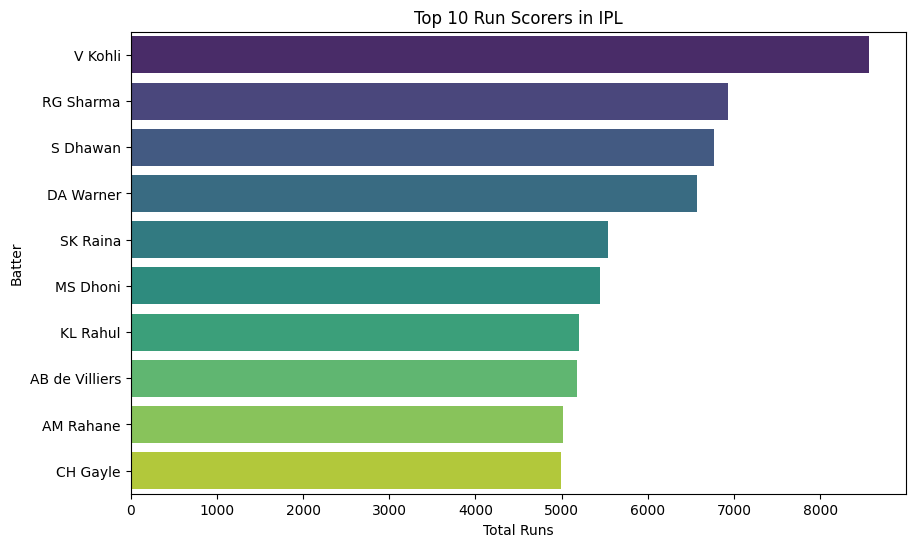

In [ ]:
# Top 10 Run Scorers
plt.figure(figsize=(10,6))
sns.barplot(data=dfs["Top 10 Run Scorers"], x='total_runs', y='batter', palette='viridis')
plt.title("Top 10 Run Scorers in IPL")
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.show()

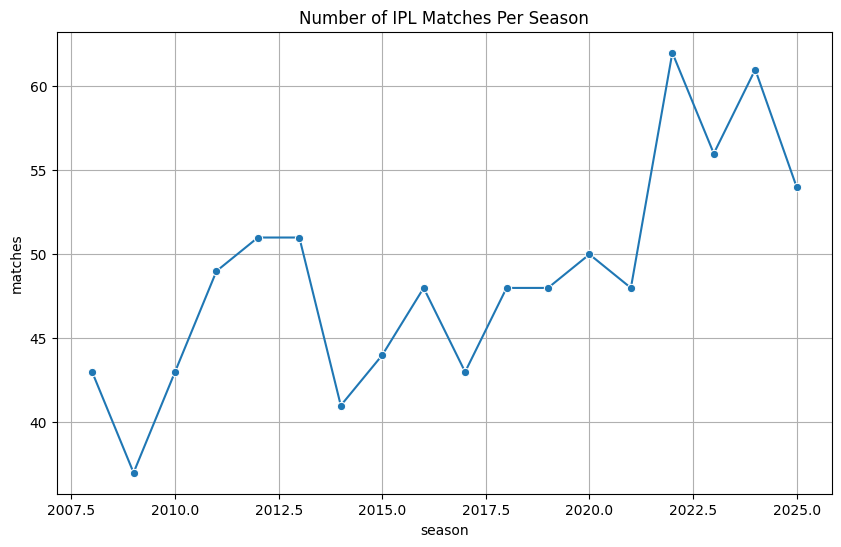

In [ ]:

# Yearly Match Trend
plt.figure(figsize=(10,6))
sns.lineplot(data=dfs["Yearly Match Trend"], x='season', y='matches', marker='o')
plt.title("Number of IPL Matches Per Season")
plt.grid(True)
plt.show()

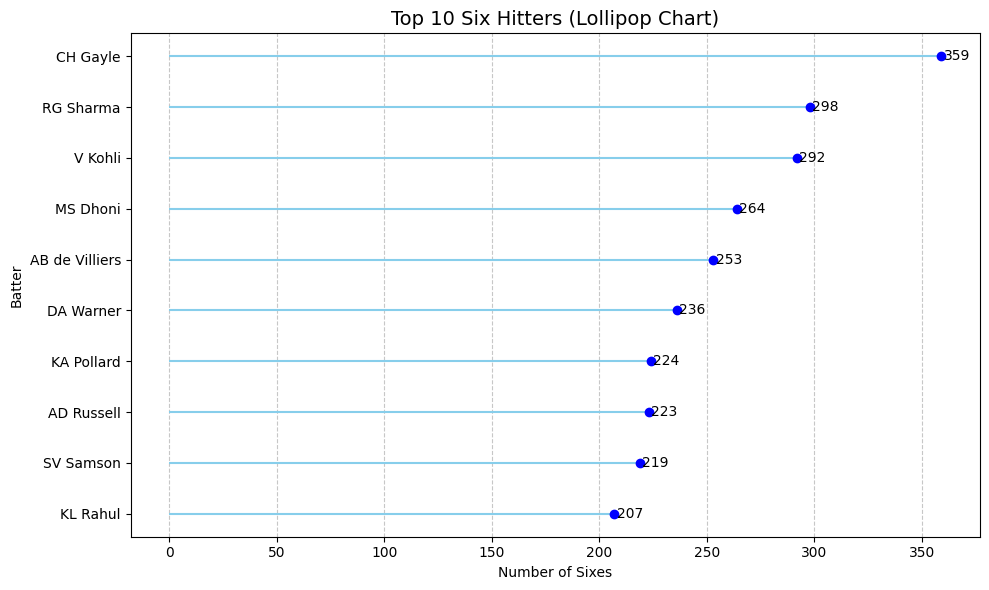

In [ ]:
# Top 10 Six Hitters - Lollipop Chart with labels
six_data = dfs["Most Six Hitters"].sort_values(by='sixes')

plt.figure(figsize=(10,6))
plt.hlines(y=six_data['batter'], xmin=0, xmax=six_data['sixes'], color='skyblue')
plt.plot(six_data['sixes'], six_data['batter'], "o", color='blue')

# Add number labels at the end of each line
for i, val in enumerate(six_data['sixes']):
    plt.text(val + 1, i, str(val), va='center', fontsize=10, color='black')

plt.title("Top 10 Six Hitters (Lollipop Chart)", fontsize=14)
plt.xlabel("Number of Sixes")
plt.ylabel("Batter")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Dot Balls by Bowler - Donut Chart with number + percent(Plotly)
fig = px.pie(
    dfs["Dot Balls by Bowler"],
    values='dot_balls',
    names='bowler',
    hole=0.4,
    title="Dot Balls Contribution (Top 10 Bowlers)",
)

fig.update_traces(
    textposition='inside',
    textinfo='label+value+percent'
)
fig.update_layout(showlegend=True)
fig.show()


T20s Match data

In [1]:
import os
import json
import pandas as pd

# Directory containing IPL JSON files
json_dir = r"C:\Users\MOHAMED RAZIK\Desktop\My_code\CricSheet\t20s_male_json"
json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

all_deliveries = []

# Loop through each JSON match file
for json_file in json_files:
    file_path = os.path.join(json_dir, json_file)
    with open(file_path, 'r') as f:
        data = json.load(f)

        # Extract general match info
        city = data['info'].get('city', 'Unknown')
        date = data['info']['dates'][0]
        season = pd.to_datetime(date).year
        event_name = data['info'].get('event', {}).get('name', 'Unknown')
        match_type = data['info']['match_type']
        venue = data['info'].get('venue', 'Unknown')

        # Match result
        if 'result' in data['info']['outcome']:
            result = data['info']['outcome']['result']
        elif 'winner' in data['info']['outcome']:
            result = data['info']['outcome']['winner']
        else:
            result = 'Unknown'

        player_of_match = data['info'].get('player_of_match', ['Unknown'])[0]
        teams = data['info'].get('teams', [])

        # Process innings
        if 'innings' in data:
            for i, inning in enumerate(data['innings']):
                batting_team = inning['team']
                bowling_team = teams[1] if teams[0] == batting_team else teams[0]

                if 'overs' in inning:
                    for over_data in inning['overs']:
                        over_number = over_data['over']
                        legal_ball_count = 0  # Reset for each over

                        if 'deliveries' in over_data:
                            for delivery in over_data['deliveries']:
                                # Ball number logic (legal balls only)
                                is_wide = delivery.get('extras', {}).get('wides', 0)
                                is_noball = delivery.get('extras', {}).get('noballs', 0)

                                # Use same ball number if it's an extra
                                if is_wide or is_noball:
                                    ball = round(over_number + ((legal_ball_count + 1) / 10), 1)
                                else:
                                    legal_ball_count += 1
                                    ball = round(over_number + (legal_ball_count / 10), 1)

                                # Basic delivery data
                                batter = delivery['batter']
                                bowler = delivery['bowler']
                                non_striker = delivery['non_striker']
                                runs_batter = delivery['runs']['batter']
                                runs_extras = delivery['runs']['extras']
                                runs_total = delivery['runs']['total']

                                # Extras
                                wides = delivery.get('extras', {}).get('wides', 0)
                                noballs = delivery.get('extras', {}).get('noballs', 0)
                                byes = delivery.get('extras', {}).get('byes', 0)
                                legbyes = delivery.get('extras', {}).get('legbyes', 0)

                                # Wicket info
                                wicket_type = None
                                player_dismissed = None
                                out = 0
                                if 'wickets' in delivery:
                                    for w in delivery['wickets']:
                                        wicket_type = w.get('kind')
                                        player_dismissed = w.get('player_out')
                                        out = 1

                                # Add to final delivery list
                                all_deliveries.append({
                                    'season': season,
                                    'city': city,
                                    'venue': venue,
                                    'date': date,
                                    'event_name': event_name,
                                    'match_type': match_type,
                                    'result': result,
                                    'player_of_match': player_of_match,
                                    'team': batting_team,
                                    'batting_team': batting_team,
                                    'bowling_team': bowling_team,
                                    'over': over_number,
                                    'ball': ball,
                                    'batter': batter,
                                    'bowler': bowler,
                                    'non_striker': non_striker,
                                    'runs_batter': runs_batter,
                                    'runs_extras': runs_extras,
                                    'runs_total': runs_total,
                                    'wides': wides,
                                    'noballs': noballs,
                                    'byes': byes,
                                    'legbyes': legbyes,
                                    'wicket_type': wicket_type,
                                    'player_dismissed': player_dismissed,
                                    'out': out
                                })

# ✅ Convert to DataFrame
df = pd.DataFrame(all_deliveries)

# ✅ Preview
print(df.head())


   season     city                     venue        date  \
0    2017  Unknown  Melbourne Cricket Ground  2017-02-17   
1    2017  Unknown  Melbourne Cricket Ground  2017-02-17   
2    2017  Unknown  Melbourne Cricket Ground  2017-02-17   
3    2017  Unknown  Melbourne Cricket Ground  2017-02-17   
4    2017  Unknown  Melbourne Cricket Ground  2017-02-17   

                           event_name match_type     result player_of_match  \
0  Sri Lanka in Australia T20I Series        T20  Sri Lanka   DAS Gunaratne   
1  Sri Lanka in Australia T20I Series        T20  Sri Lanka   DAS Gunaratne   
2  Sri Lanka in Australia T20I Series        T20  Sri Lanka   DAS Gunaratne   
3  Sri Lanka in Australia T20I Series        T20  Sri Lanka   DAS Gunaratne   
4  Sri Lanka in Australia T20I Series        T20  Sri Lanka   DAS Gunaratne   

        team batting_team  ... runs_batter  runs_extras  runs_total wides  \
0  Australia    Australia  ...           0            0           0     0   
1  Austral

In [2]:
df.isnull().sum()

season                   0
city                     0
venue                    0
date                     0
event_name               0
match_type               0
result                   0
player_of_match          0
team                     0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
runs_batter              0
runs_extras              0
runs_total               0
wides                    0
noballs                  0
byes                     0
legbyes                  0
wicket_type         571712
player_dismissed    571712
out                      0
dtype: int64

In [3]:
df.to_csv("cricket_data_t20.csv", index= False)

In [4]:
import mysql.connector

# Connect to MySQL database
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Mysql@4321",
    database="cricket_db"
)

mycursor = mydb.cursor()

# Create table with all 27 columns (including id as primary key)
create_table_query = """
CREATE TABLE IF NOT EXISTS t20 (
    id INT AUTO_INCREMENT PRIMARY KEY,           -- Unique row identifier
    season INT,                                   -- Extracted year from match date
    city VARCHAR(255),                            -- Match city
    venue VARCHAR(255),                           -- Match venue/stadium
    date DATE,                                    -- Match date
    event_name VARCHAR(255),                      -- Event name (e.g., T20)
    match_type VARCHAR(50),                       -- Match type (e.g., T20)
    result VARCHAR(255),                          -- Match result
    player_of_match VARCHAR(255),                 -- Player of the match
    team VARCHAR(255),                            -- Innings team (batting)
    batting_team VARCHAR(255),                    -- Same as team (explicit)
    bowling_team VARCHAR(255),                    -- Opponent team
    `over` INT,                                   -- Over number
    ball FLOAT,                                   -- Ball number like 5.1, 7.6
    batter VARCHAR(255),                          -- Striker
    bowler VARCHAR(255),                          -- Bowler
    non_striker VARCHAR(255),                     -- Non-striker
    runs_batter INT,                              -- Runs scored by batter
    runs_extras INT,                              -- Extras (wides, legbyes, etc.)
    runs_total INT,                               -- Total runs from that ball
    wides INT,                                     -- Wide runs
    noballs INT,                                   -- No-ball runs
    byes INT,                                      -- Bye runs
    legbyes INT,                                   -- Legbye runs
    wicket_type VARCHAR(50),                      -- Type of wicket (caught, bowled, etc.)
    player_dismissed VARCHAR(255),                -- Player who got out
    `out` TINYINT                                  -- 1 if wicket fell, 0 otherwise
)
"""

# Execute and commit the table creation
mycursor.execute(create_table_query)
mydb.commit()

print("Table 't20' created successfully with 27 columns.")


Table 't20' created successfully with 27 columns.


In [5]:
import pandas as pd
import mysql.connector
import numpy as np

# ✅ Load the CSV
csv_path = r"C:\Users\MOHAMED RAZIK\Desktop\My_code\Project2\cricket_data_t20.csv"
df = pd.read_csv(csv_path)

# ✅ Replace NaN (pandas) with None (Python native null) — needed for MySQL
df = df.replace({np.nan: None})

# ✅ Convert DataFrame to list of tuples
data = [tuple(row) for row in df.itertuples(index=False, name=None)]

# ✅ Connect to MySQL
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Mysql@4321',
    database='cricket_db'
)
mycursor = mydb.cursor()

# ✅ INSERT query for all 26 columns (excluding auto-increment id)
insert_query = """
INSERT INTO t20 (
    season, city, venue, date, event_name, match_type, result, player_of_match,
    team, batting_team, bowling_team, `over`, ball, batter, bowler, non_striker,
    runs_batter, runs_extras, runs_total, wides, noballs, byes, legbyes,
    wicket_type, player_dismissed, `out`
)
VALUES (
    %s, %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s
)
"""

# ✅ Batch insert
batch_size = 5000
total_rows = len(data)
print(f"Starting insertion of {total_rows} rows in batches of {batch_size}...")

for i in range(0, total_rows, batch_size):
    batch = data[i:i + batch_size]
    try:
        mycursor.executemany(insert_query, batch)
        mydb.commit()
        print(f"✅ Inserted batch {i // batch_size + 1} ({len(batch)} rows)")
    except mysql.connector.Error as err:
        print(f"❌ Error in batch {i // batch_size + 1}: {err}")
        mydb.rollback()

# ✅ Close connections
mycursor.close()
mydb.close()
print("🎉 Data insertion completed successfully!")


Starting insertion of 606193 rows in batches of 5000...
✅ Inserted batch 1 (5000 rows)
✅ Inserted batch 2 (5000 rows)
✅ Inserted batch 3 (5000 rows)
✅ Inserted batch 4 (5000 rows)
✅ Inserted batch 5 (5000 rows)
✅ Inserted batch 6 (5000 rows)
✅ Inserted batch 7 (5000 rows)
✅ Inserted batch 8 (5000 rows)
✅ Inserted batch 9 (5000 rows)
✅ Inserted batch 10 (5000 rows)
✅ Inserted batch 11 (5000 rows)
✅ Inserted batch 12 (5000 rows)
✅ Inserted batch 13 (5000 rows)
✅ Inserted batch 14 (5000 rows)
✅ Inserted batch 15 (5000 rows)
✅ Inserted batch 16 (5000 rows)
✅ Inserted batch 17 (5000 rows)
✅ Inserted batch 18 (5000 rows)
✅ Inserted batch 19 (5000 rows)
✅ Inserted batch 20 (5000 rows)
✅ Inserted batch 21 (5000 rows)
✅ Inserted batch 22 (5000 rows)
✅ Inserted batch 23 (5000 rows)
✅ Inserted batch 24 (5000 rows)
✅ Inserted batch 25 (5000 rows)
✅ Inserted batch 26 (5000 rows)
✅ Inserted batch 27 (5000 rows)
✅ Inserted batch 28 (5000 rows)
✅ Inserted batch 29 (5000 rows)
✅ Inserted batch 30 (5000

ODIs Match data

In [1]:
import os
import json
import pandas as pd

# Directory containing IPL JSON files
json_dir = r"C:\Users\MOHAMED RAZIK\Desktop\My_code\CricSheet\odis_male_json"
json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

all_deliveries = []

# Loop through each JSON match file
for json_file in json_files:
    file_path = os.path.join(json_dir, json_file)
    with open(file_path, 'r') as f:
        data = json.load(f)

        # Extract general match info
        city = data['info'].get('city', 'Unknown')
        date = data['info']['dates'][0]
        season = pd.to_datetime(date).year
        event_name = data['info'].get('event', {}).get('name', 'Unknown')
        match_type = data['info']['match_type']
        venue = data['info'].get('venue', 'Unknown')

        # Match result
        if 'result' in data['info']['outcome']:
            result = data['info']['outcome']['result']
        elif 'winner' in data['info']['outcome']:
            result = data['info']['outcome']['winner']
        else:
            result = 'Unknown'

        player_of_match = data['info'].get('player_of_match', ['Unknown'])[0]
        teams = data['info'].get('teams', [])

        # Process innings
        if 'innings' in data:
            for i, inning in enumerate(data['innings']):
                batting_team = inning['team']
                bowling_team = teams[1] if teams[0] == batting_team else teams[0]

                if 'overs' in inning:
                    for over_data in inning['overs']:
                        over_number = over_data['over']
                        legal_ball_count = 0  # Reset for each over

                        if 'deliveries' in over_data:
                            for delivery in over_data['deliveries']:
                                # Ball number logic (legal balls only)
                                is_wide = delivery.get('extras', {}).get('wides', 0)
                                is_noball = delivery.get('extras', {}).get('noballs', 0)

                                # Use same ball number if it's an extra
                                if is_wide or is_noball:
                                    ball = round(over_number + ((legal_ball_count + 1) / 10), 1)
                                else:
                                    legal_ball_count += 1
                                    ball = round(over_number + (legal_ball_count / 10), 1)

                                # Basic delivery data
                                batter = delivery['batter']
                                bowler = delivery['bowler']
                                non_striker = delivery['non_striker']
                                runs_batter = delivery['runs']['batter']
                                runs_extras = delivery['runs']['extras']
                                runs_total = delivery['runs']['total']

                                # Extras
                                wides = delivery.get('extras', {}).get('wides', 0)
                                noballs = delivery.get('extras', {}).get('noballs', 0)
                                byes = delivery.get('extras', {}).get('byes', 0)
                                legbyes = delivery.get('extras', {}).get('legbyes', 0)

                                # Wicket info
                                wicket_type = None
                                player_dismissed = None
                                out = 0
                                if 'wickets' in delivery:
                                    for w in delivery['wickets']:
                                        wicket_type = w.get('kind')
                                        player_dismissed = w.get('player_out')
                                        out = 1

                                # Add to final delivery list
                                all_deliveries.append({
                                    'season': season,
                                    'city': city,
                                    'venue': venue,
                                    'date': date,
                                    'event_name': event_name,
                                    'match_type': match_type,
                                    'result': result,
                                    'player_of_match': player_of_match,
                                    'team': batting_team,
                                    'batting_team': batting_team,
                                    'bowling_team': bowling_team,
                                    'over': over_number,
                                    'ball': ball,
                                    'batter': batter,
                                    'bowler': bowler,
                                    'non_striker': non_striker,
                                    'runs_batter': runs_batter,
                                    'runs_extras': runs_extras,
                                    'runs_total': runs_total,
                                    'wides': wides,
                                    'noballs': noballs,
                                    'byes': byes,
                                    'legbyes': legbyes,
                                    'wicket_type': wicket_type,
                                    'player_dismissed': player_dismissed,
                                    'out': out
                                })

# ✅ Convert to DataFrame
df = pd.DataFrame(all_deliveries)

# ✅ Preview
print(df.head())


   season      city                                   venue        date  \
0    2017  Brisbane  Brisbane Cricket Ground, Woolloongabba  2017-01-13   
1    2017  Brisbane  Brisbane Cricket Ground, Woolloongabba  2017-01-13   
2    2017  Brisbane  Brisbane Cricket Ground, Woolloongabba  2017-01-13   
3    2017  Brisbane  Brisbane Cricket Ground, Woolloongabba  2017-01-13   
4    2017  Brisbane  Brisbane Cricket Ground, Woolloongabba  2017-01-13   

                         event_name match_type     result player_of_match  \
0  Pakistan in Australia ODI Series        ODI  Australia         MS Wade   
1  Pakistan in Australia ODI Series        ODI  Australia         MS Wade   
2  Pakistan in Australia ODI Series        ODI  Australia         MS Wade   
3  Pakistan in Australia ODI Series        ODI  Australia         MS Wade   
4  Pakistan in Australia ODI Series        ODI  Australia         MS Wade   

        team batting_team  ... runs_batter  runs_extras  runs_total wides  \
0  Austra

In [2]:
df.isnull().sum()

season                    0
city                      0
venue                     0
date                      0
event_name                0
match_type                0
result                    0
player_of_match           0
team                      0
batting_team              0
bowling_team              0
over                      0
ball                      0
batter                    0
bowler                    0
non_striker               0
runs_batter               0
runs_extras               0
runs_total                0
wides                     0
noballs                   0
byes                      0
legbyes                   0
wicket_type         1261922
player_dismissed    1261922
out                       0
dtype: int64

In [3]:
df.to_csv("cricket_data_odi.csv", index= False)

In [5]:
import mysql.connector

# Connect to MySQL database
mydb = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Mysql@4321",
    database="cricket_db"
)

mycursor = mydb.cursor()

# Create table with all 27 columns (including id as primary key)
create_table_query = """
CREATE TABLE IF NOT EXISTS odi (
    id INT AUTO_INCREMENT PRIMARY KEY,           -- Unique row identifier
    season INT,                                   -- Extracted year from match date
    city VARCHAR(255),                            -- Match city
    venue VARCHAR(255),                           -- Match venue/stadium
    date DATE,                                    -- Match date
    event_name VARCHAR(255),                      -- Event name (e.g., odi)
    match_type VARCHAR(50),                       -- Match type (e.g., odi)
    result VARCHAR(255),                          -- Match result
    player_of_match VARCHAR(255),                 -- Player of the match
    team VARCHAR(255),                            -- Innings team (batting)
    batting_team VARCHAR(255),                    -- Same as team (explicit)
    bowling_team VARCHAR(255),                    -- Opponent team
    `over` INT,                                   -- Over number
    ball FLOAT,                                   -- Ball number like 5.1, 7.6
    batter VARCHAR(255),                          -- Striker
    bowler VARCHAR(255),                          -- Bowler
    non_striker VARCHAR(255),                     -- Non-striker
    runs_batter INT,                              -- Runs scored by batter
    runs_extras INT,                              -- Extras (wides, legbyes, etc.)
    runs_total INT,                               -- Total runs from that ball
    wides INT,                                     -- Wide runs
    noballs INT,                                   -- No-ball runs
    byes INT,                                      -- Bye runs
    legbyes INT,                                   -- Legbye runs
    wicket_type VARCHAR(50),                      -- Type of wicket (caught, bowled, etc.)
    player_dismissed VARCHAR(255),                -- Player who got out
    `out` TINYINT                                  -- 1 if wicket fell, 0 otherwise
)
"""

# Execute and commit the table creation
mycursor.execute(create_table_query)
mydb.commit()

print("Table 'odi' created successfully with 27 columns.")


Table 'odi' created successfully with 27 columns.


In [6]:
import pandas as pd
import mysql.connector
import numpy as np

# ✅ Load the CSV
csv_path = r"C:\Users\MOHAMED RAZIK\Desktop\My_code\Project2\cricket_data_odi.csv"
df = pd.read_csv(csv_path)

# ✅ Replace NaN (pandas) with None (Python native null) — needed for MySQL
df = df.replace({np.nan: None})

# ✅ Convert DataFrame to list of tuples
data = [tuple(row) for row in df.itertuples(index=False, name=None)]

# ✅ Connect to MySQL
mydb = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Mysql@4321',
    database='cricket_db'
)
mycursor = mydb.cursor()

# ✅ INSERT query for all 26 columns (excluding auto-increment id)
insert_query = """
INSERT INTO odi (
    season, city, venue, date, event_name, match_type, result, player_of_match,
    team, batting_team, bowling_team, `over`, ball, batter, bowler, non_striker,
    runs_batter, runs_extras, runs_total, wides, noballs, byes, legbyes,
    wicket_type, player_dismissed, `out`
)
VALUES (
    %s, %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s
)
"""

# ✅ Batch insert
batch_size = 5000
total_rows = len(data)
print(f"Starting insertion of {total_rows} rows in batches of {batch_size}...")

for i in range(0, total_rows, batch_size):
    batch = data[i:i + batch_size]
    try:
        mycursor.executemany(insert_query, batch)
        mydb.commit()
        print(f"✅ Inserted batch {i // batch_size + 1} ({len(batch)} rows)")
    except mysql.connector.Error as err:
        print(f"❌ Error in batch {i // batch_size + 1}: {err}")
        mydb.rollback()

# ✅ Close connections
mycursor.close()
mydb.close()
print("🎉 Data insertion completed successfully!")


Starting insertion of 1297341 rows in batches of 5000...
✅ Inserted batch 1 (5000 rows)
✅ Inserted batch 2 (5000 rows)
✅ Inserted batch 3 (5000 rows)
✅ Inserted batch 4 (5000 rows)
✅ Inserted batch 5 (5000 rows)
✅ Inserted batch 6 (5000 rows)
✅ Inserted batch 7 (5000 rows)
✅ Inserted batch 8 (5000 rows)
✅ Inserted batch 9 (5000 rows)
✅ Inserted batch 10 (5000 rows)
✅ Inserted batch 11 (5000 rows)
✅ Inserted batch 12 (5000 rows)
✅ Inserted batch 13 (5000 rows)
✅ Inserted batch 14 (5000 rows)
✅ Inserted batch 15 (5000 rows)
✅ Inserted batch 16 (5000 rows)
✅ Inserted batch 17 (5000 rows)
✅ Inserted batch 18 (5000 rows)
✅ Inserted batch 19 (5000 rows)
✅ Inserted batch 20 (5000 rows)
✅ Inserted batch 21 (5000 rows)
✅ Inserted batch 22 (5000 rows)
✅ Inserted batch 23 (5000 rows)
✅ Inserted batch 24 (5000 rows)
✅ Inserted batch 25 (5000 rows)
✅ Inserted batch 26 (5000 rows)
✅ Inserted batch 27 (5000 rows)
✅ Inserted batch 28 (5000 rows)
✅ Inserted batch 29 (5000 rows)
✅ Inserted batch 30 (500